In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [4]:
rd = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
rd.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#AnonOccupy: Bio of a Villain,2015,USA,2015-11-05
2,#Beings,2015,Romania,2015-01-29
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Nerealnaya lyubov,2014,Russia,2014-02-13


In [8]:
c = cast[cast.name=="Tom Hanks"]
c.merge(rd).head() # combines on like rows


,title,year,name,type,character,n,country,date
0,A Hologram for the King,2015,Tom Hanks,actor,Alan Clay,NaN,Netherlands,2015-11-25
1,A League of Their Own,1992,Tom Hanks,actor,Jimmy Dugan,1,Canada,1992-07-01
2,A League of Their Own,1992,Tom Hanks,actor,Jimmy Dugan,1,USA,1992-07-01
3,A League of Their Own,1992,Tom Hanks,actor,Jimmy Dugan,1,Australia,1992-09-10
4,A League of Their Own,1992,Tom Hanks,actor,Jimmy Dugan,1,UK,1992-09-18


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


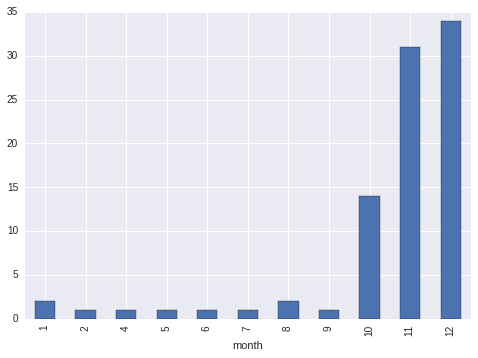

In [8]:
a = rd[(rd.title.str.contains("Christmas")) & (rd.country=="USA")]#.groupby("date").size()
a["month"] = a.date.dt.month
a.groupby(["month"]).size().plot(kind="bar")

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


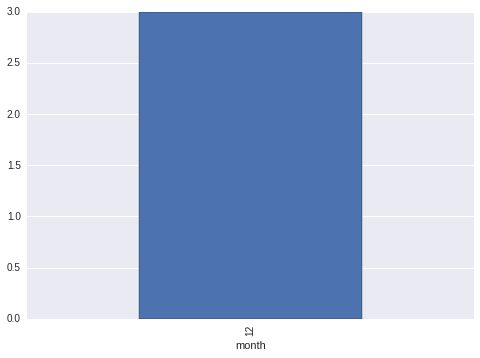

In [9]:
a = rd[(rd.title.str.startswith("The Hobbit")) & (rd.country=="USA")]#.groupby("date").size()
a["month"] = a.date.dt.month
a.groupby(["month"]).size().plot(kind="bar")

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


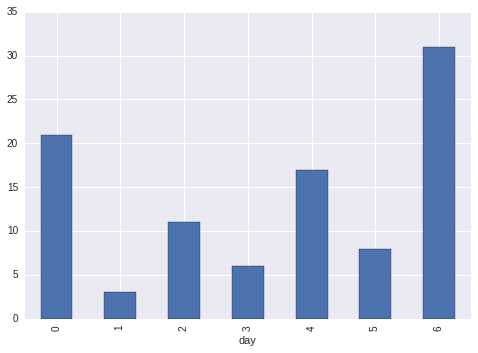

In [10]:
a = rd[(rd.title.str.contains("Romance")) & (rd.country=="USA")]#.groupby("date").size()
a["day"] = a.date.dt.dayofweek
a.groupby(["day"]).size().plot(kind="bar")

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


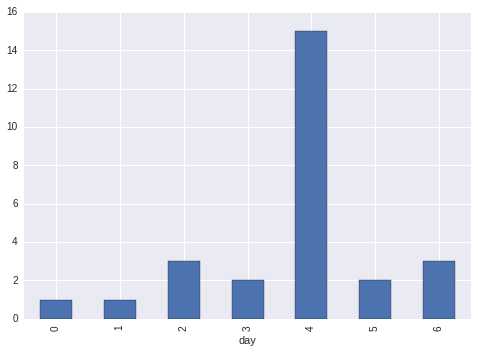

In [11]:
a = rd[(rd.title.str.contains("Action")) & (rd.country=="USA")]#.groupby("date").size()
a["day"] = a.date.dt.dayofweek
a.groupby(["day"]).size().plot(kind="bar")

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [36]:
c = cast[(cast.name=="Judi Dench") & (cast.year//10 == 199)]
new=(rd[rd.country=="USA"])
new.head()
#new.merge(c)
c.merge(new).date.value_counts().index#.plot(kind="line") #MAKE SURE TO KEEP DATE
#c.head()

DatetimeIndex(['1997-07-18', '1997-12-19', '1999-11-19', '1995-11-17',
               '1996-03-22', '1999-01-08', '1999-05-14', '1996-12-25'],
              dtype='datetime64[ns]', freq=None, tz=None)

### In which months do films with Judi Dench tend to be released in the USA?

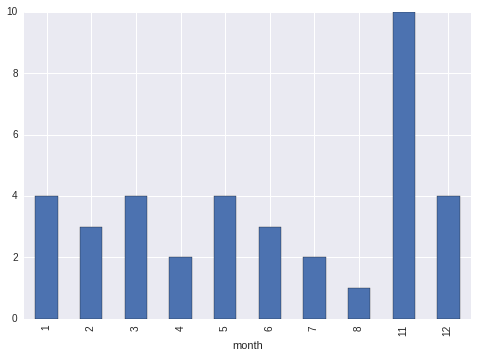

In [21]:
c = cast[cast.name=="Judi Dench"]
r = rd[rd.country == "USA"]
new = c.merge(r)

new["month"] = new.date.dt.month
#new.head()
new.groupby(["month"]).size().plot(kind="bar")

### In which months do films with Tom Cruise tend to be released in the USA?

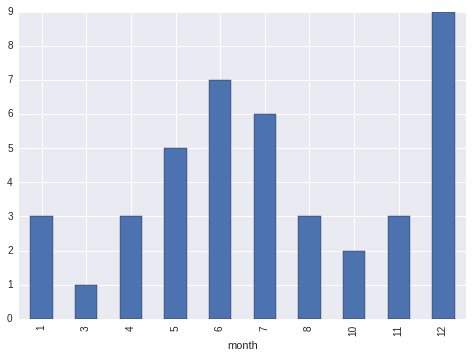

In [38]:
c = cast[cast.name=="Tom Cruise"]
r = rd[rd.country == "USA"]
new = c.merge(r)
new["month"] = new.date.dt.month
new.groupby(["month"]).size().plot(kind="bar")